# AI POWERED NUTRITION AND FITTNESS PLANNER



Comment : Technologies: Front-end: HTML, CSS, JS Back-end: Python
Comment By : PYTTL
Date : 04 Feb 2025 17:58 PM
Comment : Dataset: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
 Here we predicting Percent body fat Algorithms: LSTM, Random Forest,
 XGBoost After predicting the fat in body we can suggest nutrition and exercises Dataset 
Parameters Density determined from underwater weighing Percent body fat from Siri's (1956) 
equation Age (years) Weight (lbs) Height (inches) Neck circumference (cm) Chest circumference (cm) 
Abdomen 2 circumference (cm) Hip circumference (cm) Thigh circumference (cm) Knee circumference (cm) 
Ankle circumference (cm) Biceps (extended) circumference (cm) Forearm circumference (cm) Wrist circumference (cm).



In [15]:
# import neccesary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib as jb
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# read data set
data=pd.read_csv('bodyfat.csv')

In [3]:
# display first five rows
data.head()


Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [4]:
# display last five rows
data.tail()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9

Exploratory Data Analysis (EDA)

In [5]:
data.shape

(252, 15)

In [6]:
# infomation about colums
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
# get columns name
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [8]:
# check null values
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

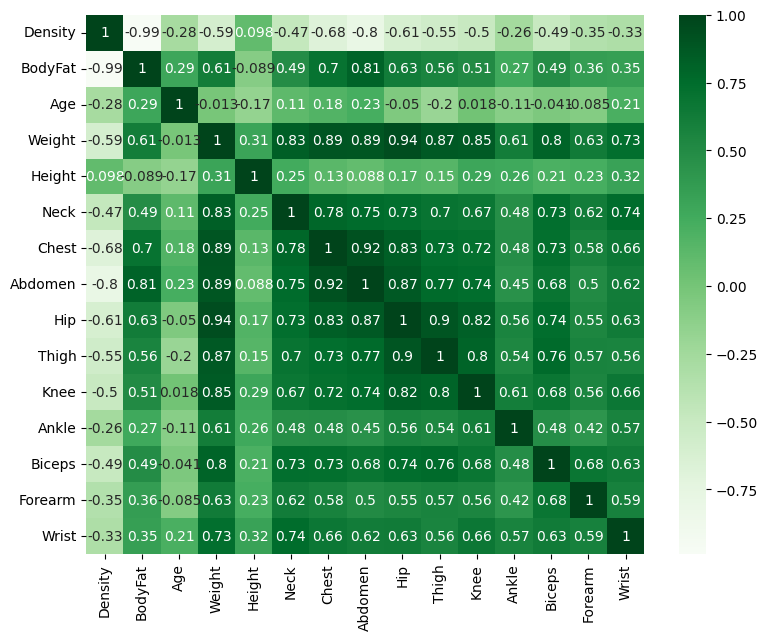

In [9]:
# find the corelation b/w the data and plot
cor=data.corr()
plt.figure(figsize=(9,7))
sn.heatmap(cor,annot=True,cmap='Greens')
plt.show()

In [10]:
# statistical summary of the dataset
data.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

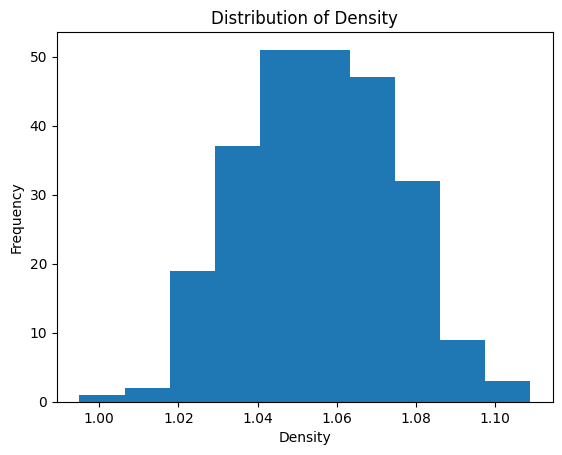

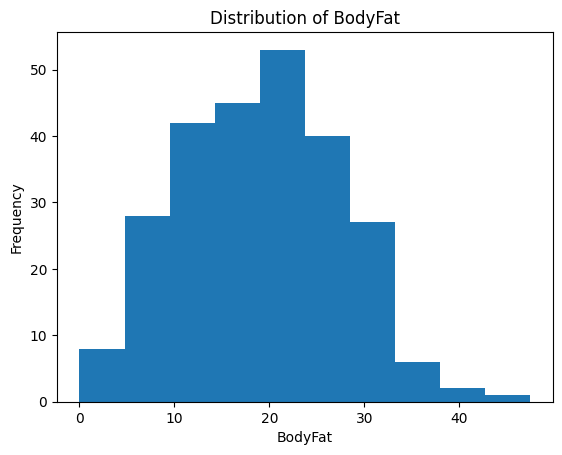

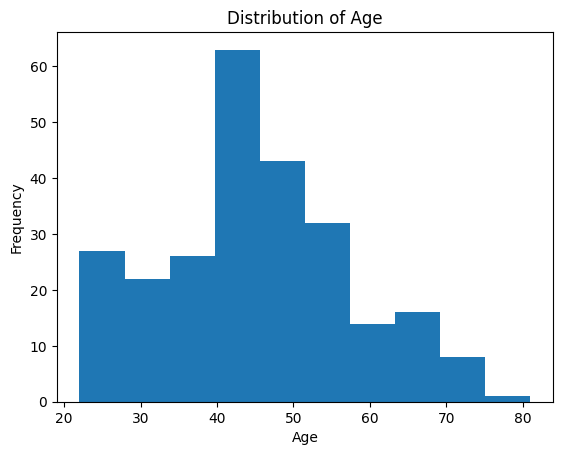

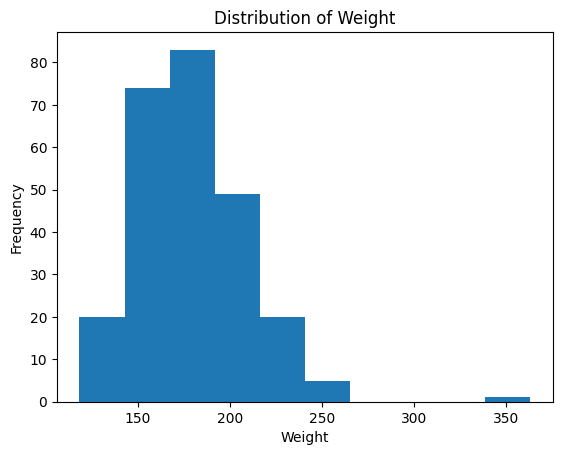

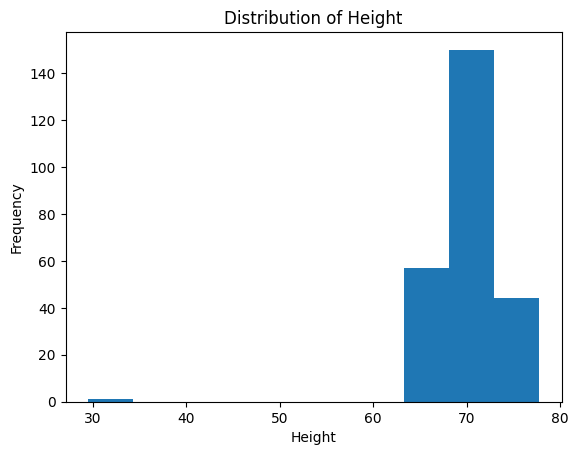

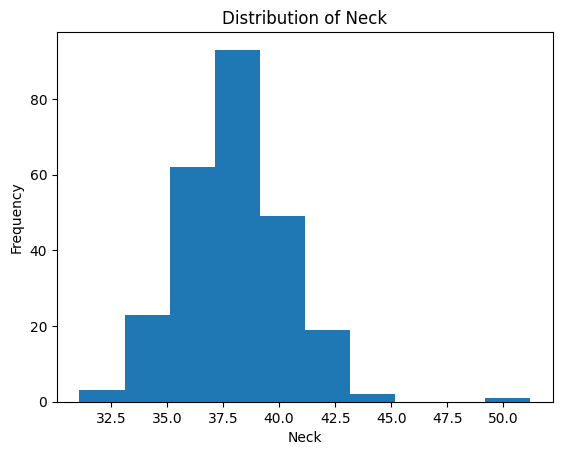

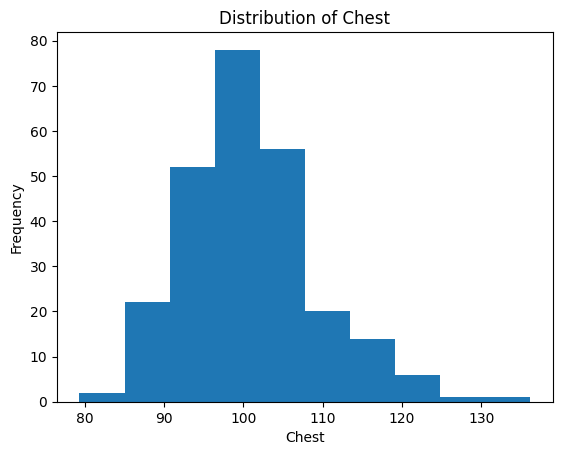

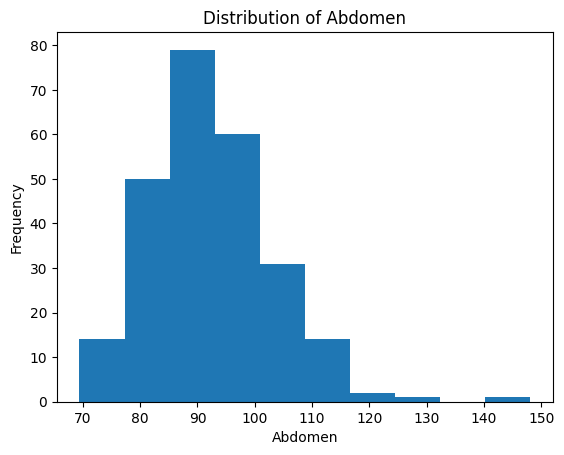

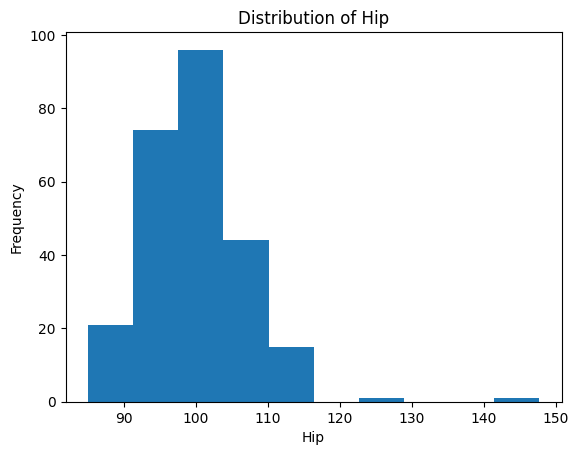

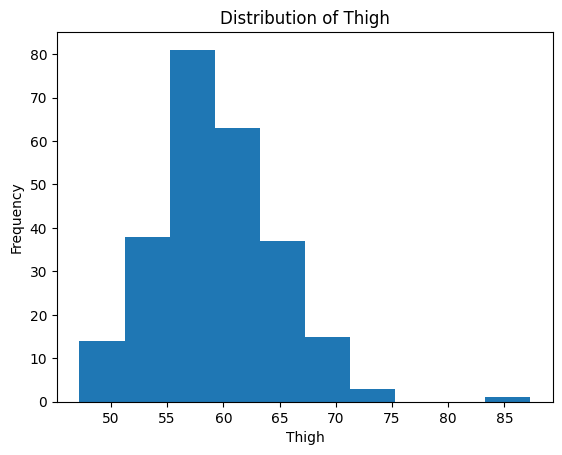

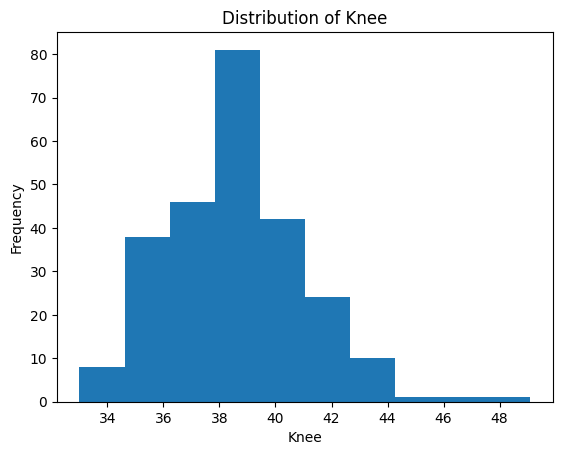

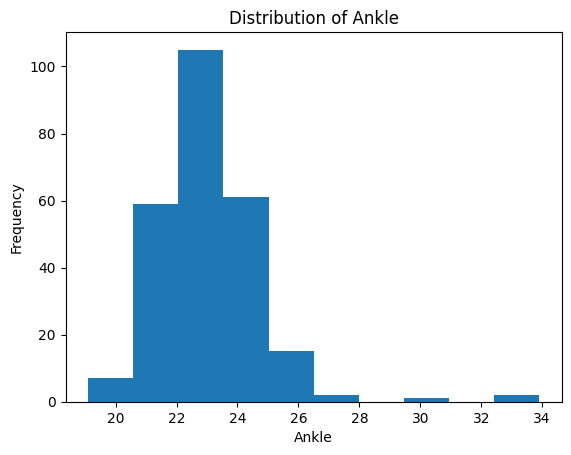

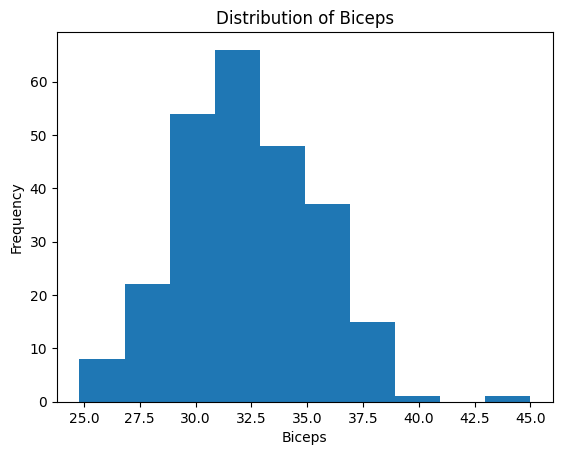

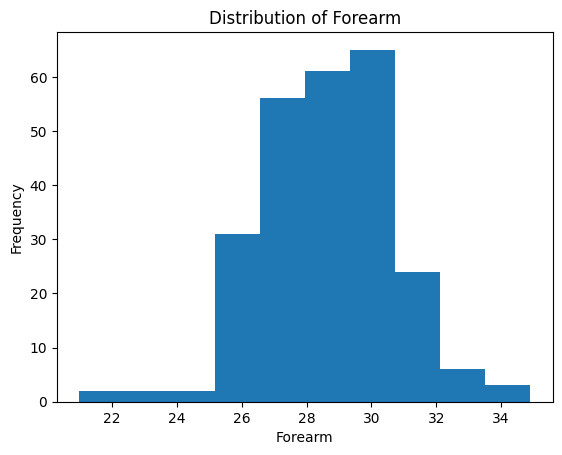

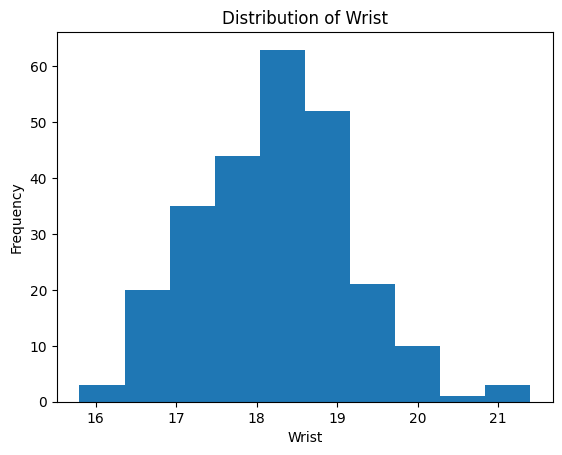

In [11]:
# find the distribution of colums in data set

for i in data.columns:
    plt.figure()
    plt.hist(data[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
plt.show()


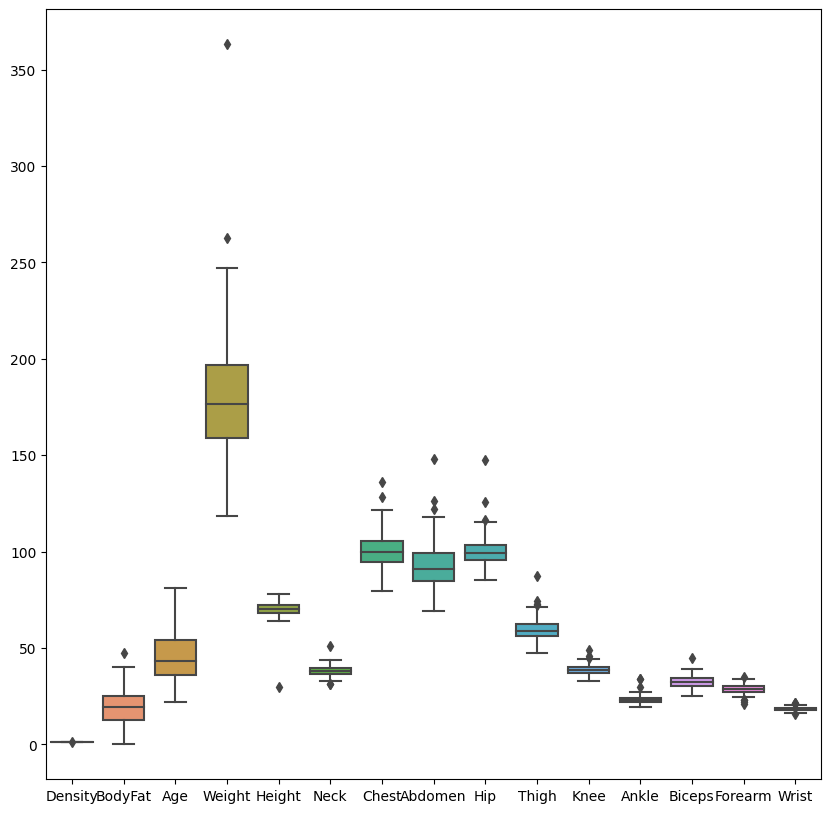

In [7]:
# checking outlayer values
plt.figure(figsize=(10,10))
sn.boxplot(data)
plt.show()

In [8]:
# remove the outlayers by iqr methord

for i in data.columns:
    q1=np.percentile(data[i],25)
    q3=np.percentile(data[i],75)
    iqr=q3-q1
    u_li=q3+1.5*iqr
    l_lim=q1-1.5*iqr
    data[i]=data[i].clip(upper=u_li,lower=l_lim)


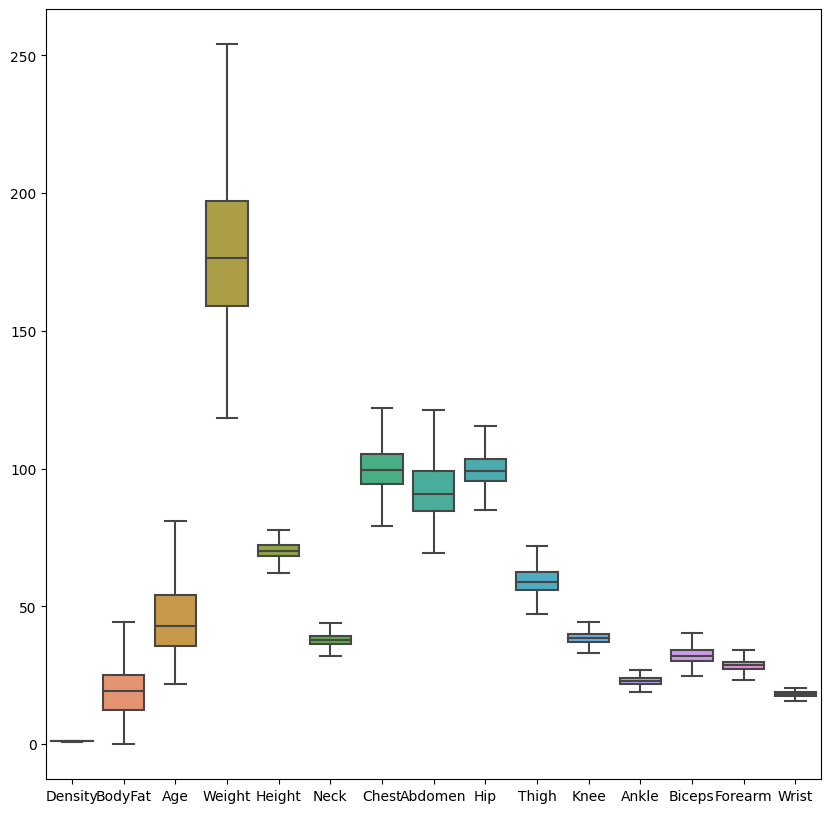

In [9]:
# checking after removing outlayer
plt.figure(figsize=(10,10))
sn.boxplot(data)
plt.show()

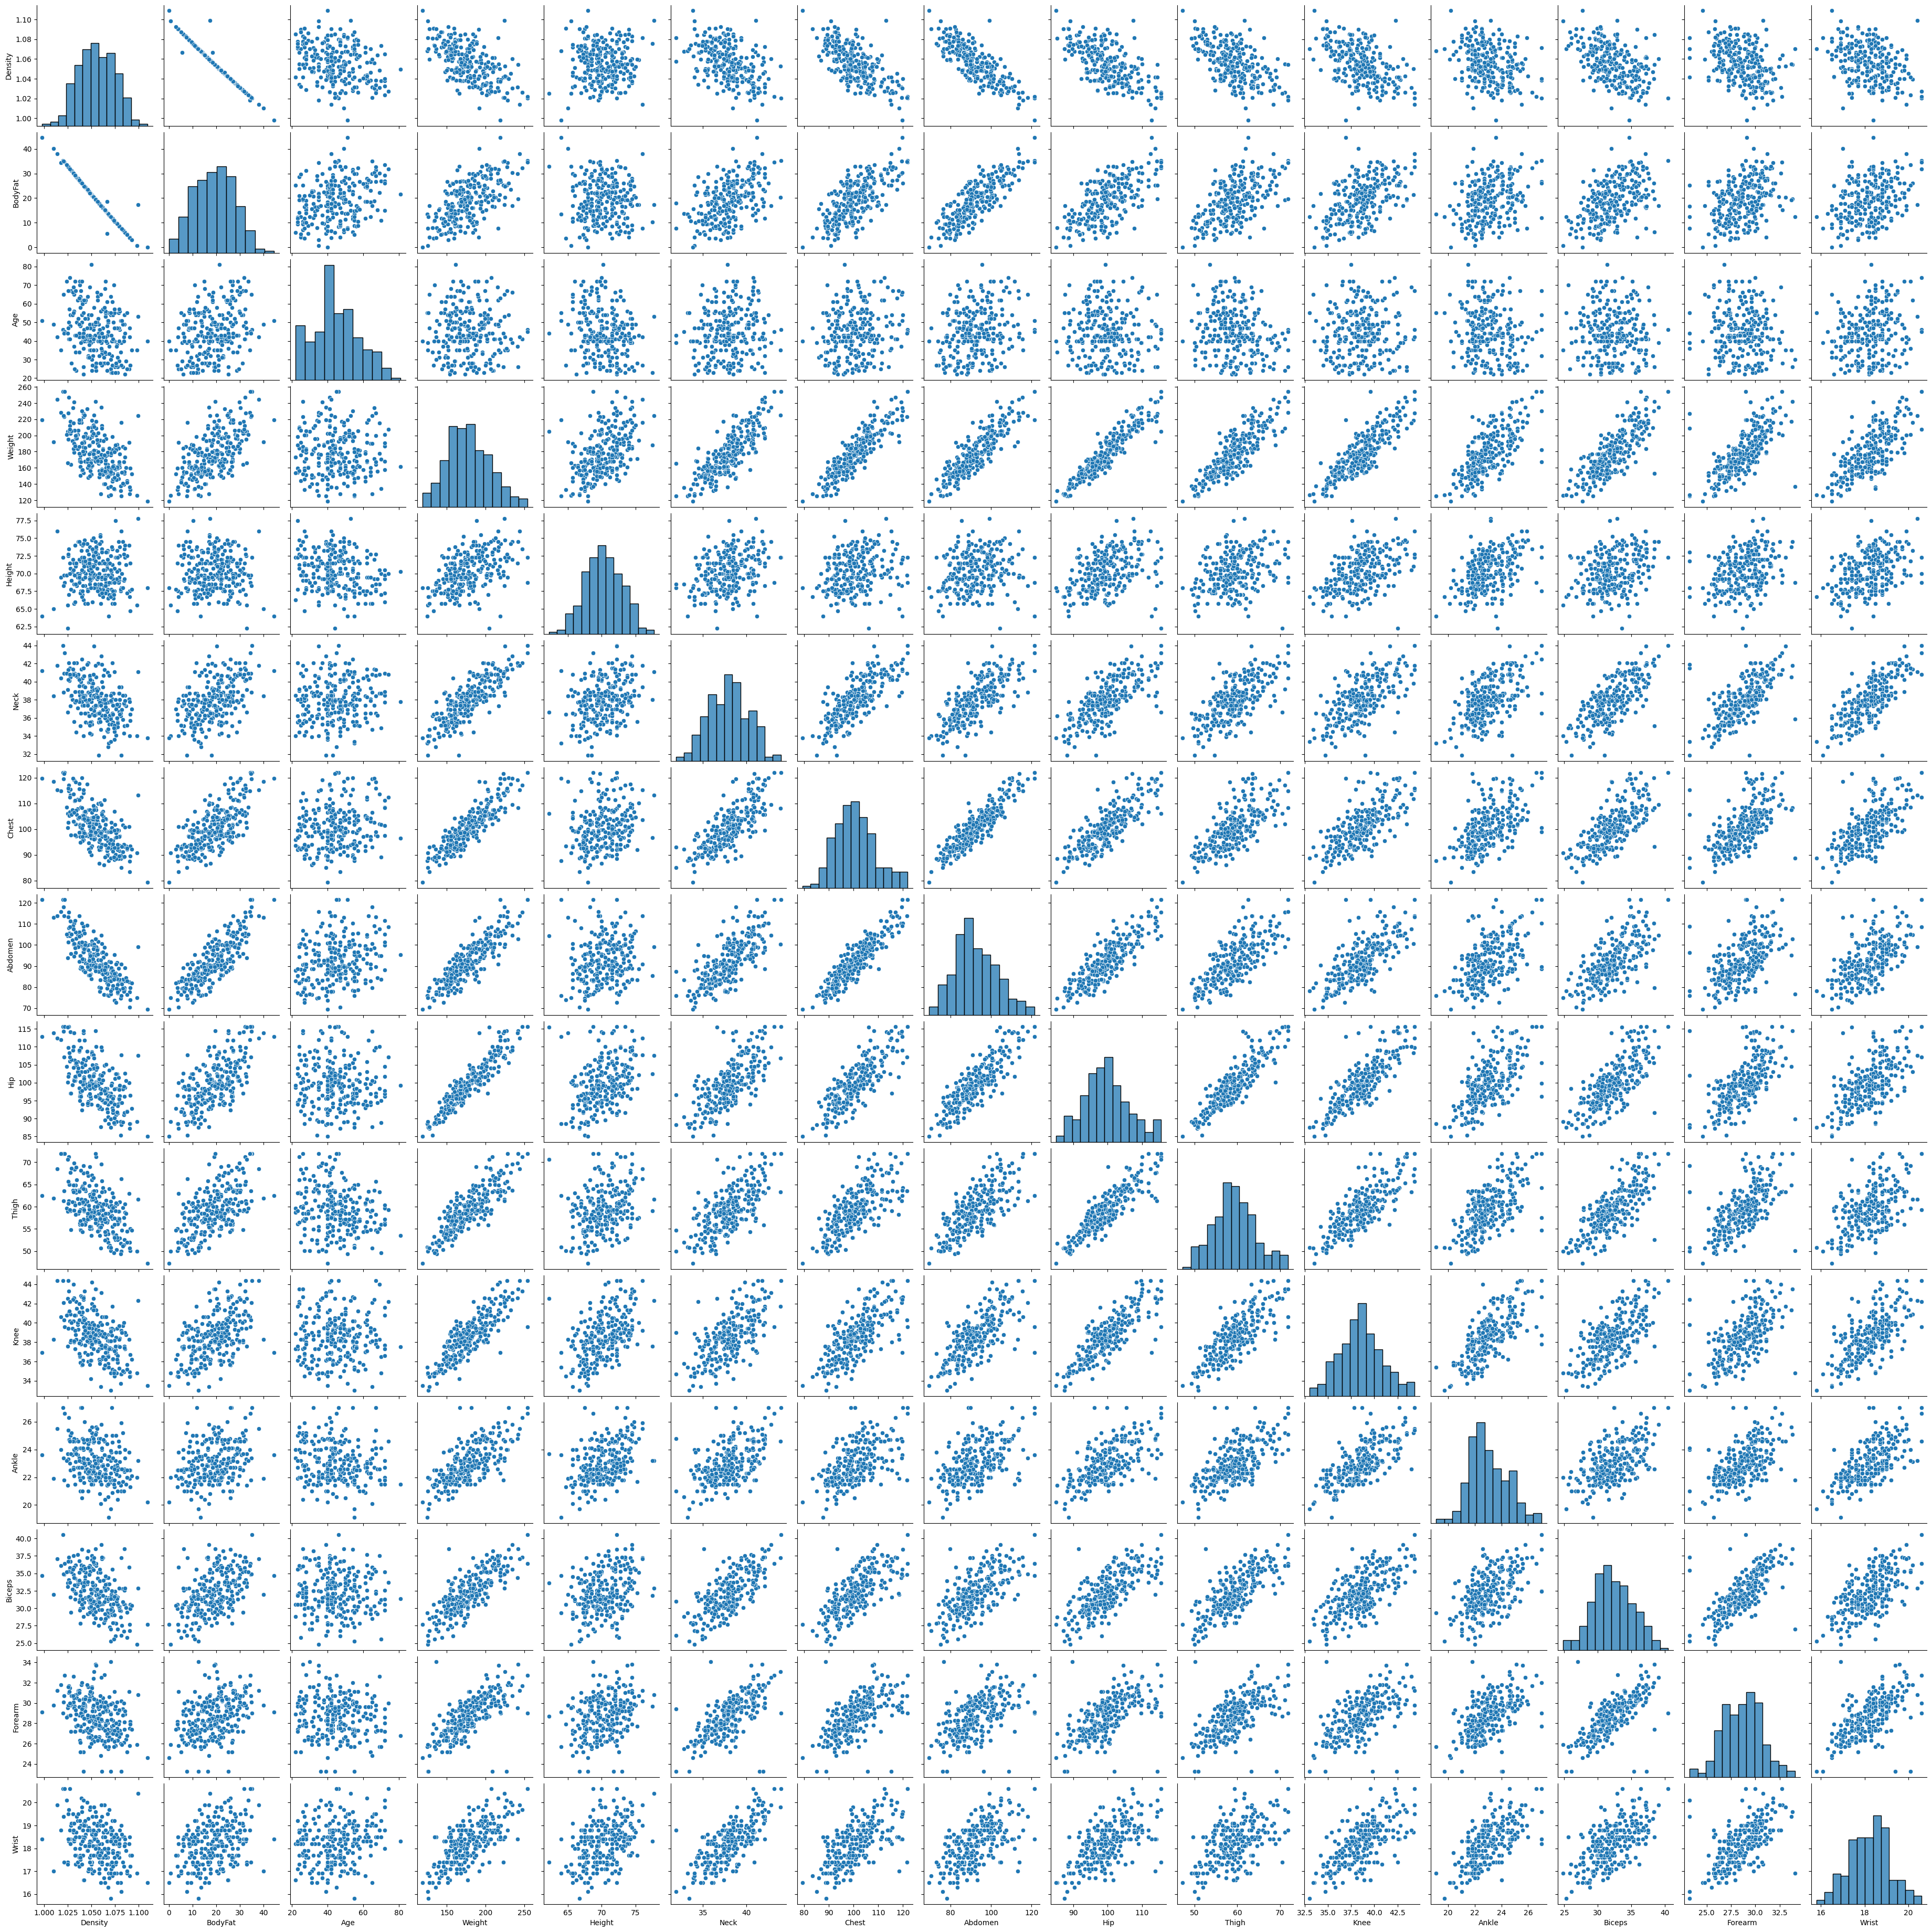

In [15]:
# pair plot of data
sn.pairplot(data)
plt.show()

In [121]:
# split the dataset into dependent and independent variables
x= data.drop(['BodyFat'], axis = 1)
y = data['BodyFat']

In [122]:
# train,test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=32    )

In [123]:
# print shape of train and test data
print(xtrain.shape,xtest.shape)

(201, 14) (51, 14)


In [124]:
scaler =MinMaxScaler()
s_xtrain=scaler.fit_transform(xtrain)
s_xtest=scaler.transform(xtest)

 ##  Random Forest


In [30]:
# train the model
r_model=RandomForestRegressor(random_state=32)
r_model.fit(s_xtrain,ytrain)

RandomForestRegressor(random_state=32)

In [31]:
# test the model
rtpred=r_model.predict(s_xtrain)
rpred=r_model.predict(s_xtest)

In [32]:
r1=r2_score(ytest,rpred)
mse1=mean_squared_error(ytest,rpred)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(ytest,rpred)
print('r2_score',r1)
print('mean_squared_error',mse1)
print('root mean square error',rmse1)
print('mean_absolute_error',mae1)

r2_score 0.979670973662473
mean_squared_error 0.8927778367034318
root mean square error 0.944869216719135
mean_absolute_error 0.30690931372549235


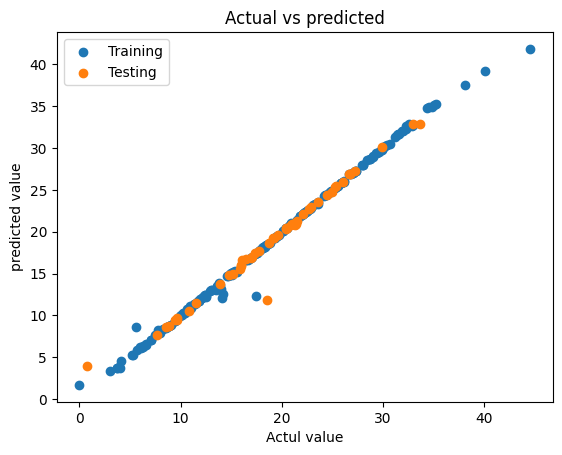

In [23]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,rtpred)
plt.scatter(ytest,rpred)
plt.xlabel('Actul value')
plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

## Xgboost

In [74]:
# fitting model
x_model=XGBRegressor()
x_model.fit(s_xtrain,ytrain)

# predicting values
xtpred=x_model.predict(s_xtrain)
xpred=x_model.predict(s_xtest)



In [75]:
r2=r2_score(ytest,xpred)
mse2=mean_squared_error(ytest,xpred)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(ytest,xpred)
print('r2_score',r2)
print('mean_squared_error',mse2)
print('root mean square error',rmse2)
print('mean_absolute_error',mae2)

r2_score 0.9821611126900112
mean_squared_error 0.7834198725203464
root mean square error 0.8851100906216958
mean_absolute_error 0.3941403585321762


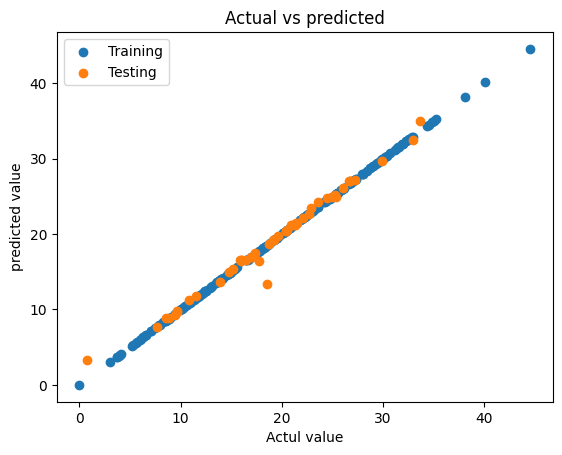

In [34]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,xtpred)
plt.scatter(ytest,xpred)
plt.xlabel('Actul value')
plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

In [45]:

pd.DataFrame({'Actual value':ytest,'predicted value':xpred})

Actual value  predicted value
17           22.9        23.513031
154          21.0        21.139935
233          26.7        27.073372
23           17.7        16.370424
218          24.5        24.784483
192          15.9        16.512331
131          22.7        22.685410
226          14.8        14.942711
113          21.3        21.215328
33           21.3        21.149757
143           9.4         9.310688
46           10.8        11.211019
117          13.9        13.599099
75           18.5        13.427446
93           24.9        24.883966
165          19.2        19.214407
44            7.7         7.621449
179          16.9        16.996532
213          18.7        18.733631
114          26.7        27.067709
123          16.0        16.364939
20           19.1        19.186998
208           9.6         9.682724
85           26.6        27.032986
96            9.6         9.853071
239          29.9        29.727104
109          21.4        21.515226
240          17.0        17.011034
211          27.2        27.122679
206          32.9        32.443531
14           22.1        22.145958
231          16.1        16.509346
72            8.5         8.847962
101          20.4        20.451933
248          33.6        34.955013
108          17.3        17.449434
172          20.5        20.482706
182          11.5        11.850970
18           16.0        16.545071
171           0.7         3.349048
151          19.6        19.691133
149          25.2        25.222084
221          26.0        26.118294
66           21.5        21.498991
15           20.9        21.249117
2            25.3        24.921112
56           20.4        20.439394
29            8.8         8.849355
132          23.6        24.259621
169          16.5        16.557295
21           15.2        15.333682

In [14]:
## LSTM MODEL

In [125]:
# Reshape the data for LSTM (samples, timesteps, features)
X_train_lstm = s_xtrain.reshape(s_xtrain.shape[0], 1, s_xtrain.shape[1])
X_test_lstm = s_xtest.reshape(s_xtest.shape[0], 1, s_xtest.shape[1])

model_lstm = Sequential([
    LSTM(units=100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),return_sequences=True),
    LSTM(units=100, activation='relu',return_sequences=True),
     LSTM(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
    Dense(units=1,activation='relu') 
])

# check over fitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train_lstm, ytrain, epochs=100, batch_size=32,validation_data=(X_test_lstm,ytest),callbacks=early_stopping)



Epoch 1/100


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 456.1297 - val_loss: 407.5785
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 432.2628 - val_loss: 405.7216
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 423.2452 - val_loss: 402.8666
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 470.8730 - val_loss: 397.4449
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 432.9607 - val_loss: 384.8797
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 413.1892 - val_loss: 349.9404
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 357.6587 - val_loss: 246.7741
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 234.5877 - val_loss: 115.1427
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 94.3076 - val_loss: 165.6285
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.6337 - val_loss: 103.4456
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.4424 - val_loss: 98.4887
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms

In [126]:

xtpred=model_lstm.predict(X_train_lstm)
xpred=model_lstm.predict(X_test_lstm)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [127]:
r3=r2_score(ytest,xpred)
mse3=mean_squared_error(ytest,xpred)
rmse3=np.sqrt(mse3)
mae3=mean_absolute_error(ytest,xpred)
print('r2_score',r3)
print('mean_squared_error',mse3)
print('root mean square error',rmse3)
print('mean_absolute_error',mae3)

r2_score 0.777196794033029
mean_squared_error 9.784716736117911
root mean square error 3.1280531862674446
mean_absolute_error 2.589485966925528


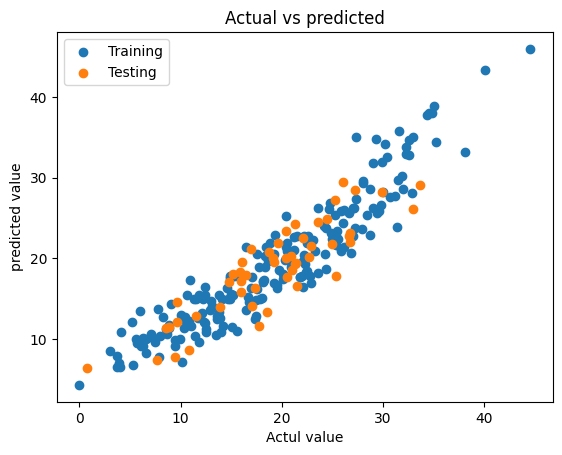

In [128]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,xtpred)
plt.scatter(ytest,xpred)
plt.xlabel('Actul value')
plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

In [52]:
# K best methords for feature selection

In [129]:
from sklearn.feature_selection import mutual_info_regression


m_score=mutual_info_regression(xtrain,ytrain)


In [130]:
pd.Series(m_score).sort_values(ascending=False)

0     3.781759
6     0.673854
2     0.402173
7     0.400532
5     0.398109
8     0.308516
9     0.186587
11    0.183662
1     0.106425
12    0.102177
4     0.087665
13    0.044866
10    0.003598
3     0.000000
dtype: float64

<Axes: >

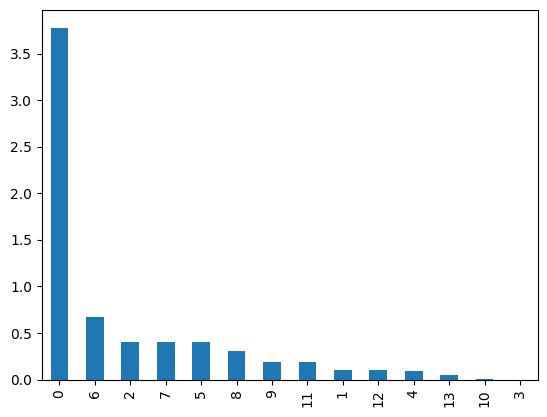

In [131]:
pd.Series(m_score).sort_values(ascending=False).plot.bar()

In [132]:
from sklearn.feature_selection import SelectKBest

select_c=SelectKBest(score_func=mutual_info_regression,k=10)
new=select_c.fit_transform(xtrain,ytrain)


In [133]:
x.columns[select_c.get_support()]

Index(['Density', 'Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Biceps'],
      dtype='object')

In [134]:
x_s=x[['Density', 'Age', 'Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee',
       'Biceps', 'Forearm']]

In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x_s,y,test_size=0.25,random_state=23)

In [136]:
print(xtrain.shape)

(189, 10)


In [137]:
sc=MinMaxScaler()
sxtrain=sc.fit_transform(xtrain)
sxtest=sc.transform(xtest)

In [138]:
import joblib
joblib.dump(sc,'scal.joblib')

['scal.joblib']

In [87]:
# applay models after selecting best features

# Radom forest

In [139]:
rmodel=RandomForestRegressor(random_state=32)
rmodel.fit(sxtrain,ytrain)


# predicting values
xtpred=rmodel.predict(sxtrain)
xpred=rmodel.predict(sxtest)



In [140]:
r1=r2_score(ytest,xpred)
mse1=mean_squared_error(ytest,xpred)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(ytest,xpred)
print('r2_score',r1)
print('mean_squared_error',mse1)
print('root mean square error',rmse1)
print('mean_absolute_error',mae1)

r2_score 0.9750218120774705
mean_squared_error 1.5691895518353172
root mean square error 1.252672962841985
mean_absolute_error 0.4045535714285701


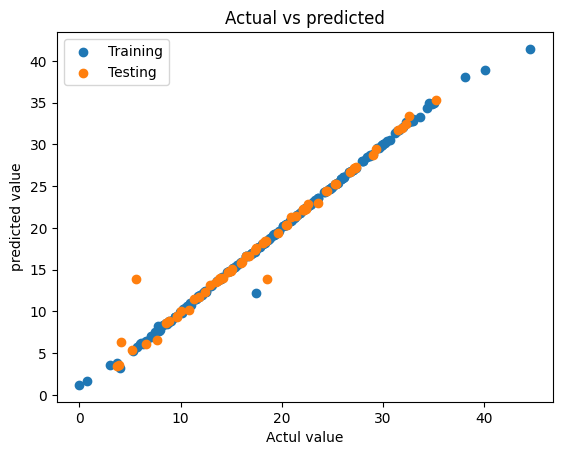

In [141]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,xtpred)
plt.scatter(ytest,xpred)
plt.xlabel('Actul value')
plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

In [155]:
# save model
joblib.dump(rmodel,'random.joblib')

['random.joblib']

# XGboost

In [142]:
xgboost=XGBRegressor()
xgboost.fit(sxtrain,ytrain)


# predicting values
xtpred=xgboost.predict(sxtrain)
xpred=xgboost.predict(sxtest)



In [143]:
r2=r2_score(ytest,xpred)
mse2=mean_squared_error(ytest,xpred)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(ytest,xpred)
print('r2_score',r2)
print('mean_squared_error',mse2)
print('root mean square error',rmse2)
print('mean_absolute_error',mae2)

r2_score 0.9686820019450116
mean_squared_error 1.9674715990090048
root mean square error 1.402665890014085
mean_absolute_error 0.5879051329597593


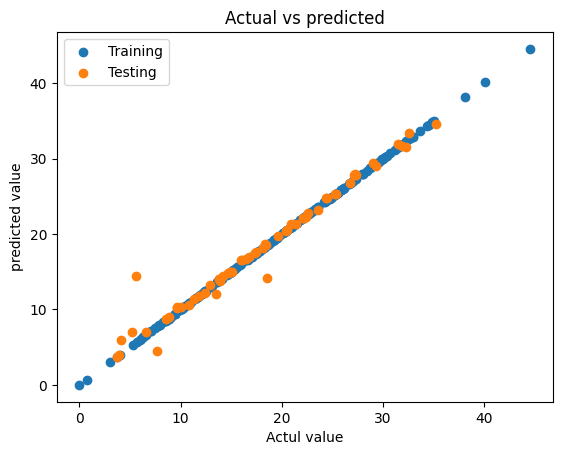

In [144]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,xtpred)
plt.scatter(ytest,xpred)
plt.xlabel('Actul value')
plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

In [146]:
# model save
joblib.dump(xgboost,'Xgboost.joblib')

['Xgboost.joblib']

# Lstm

In [150]:
# Reshape the data for LSTM (samples, timesteps, features)
X_train_lstm = sxtrain.reshape(sxtrain.shape[0], 1, sxtrain.shape[1])
X_test_lstm = sxtest.reshape(sxtest.shape[0], 1, sxtest.shape[1])

model_lstm = Sequential([
    LSTM(units=100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),return_sequences=True),
    LSTM(units=100, activation='relu',return_sequences=True),
     LSTM(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
    Dense(units=1,activation='relu') 
])

# check over fitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train_lstm, ytrain, epochs=100, batch_size=32,validation_data=(X_test_lstm,ytest),callbacks=early_stopping)



Epoch 1/100


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 415.0228 - val_loss: 388.6491
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 473.5648 - val_loss: 387.1671
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 446.4046 - val_loss: 385.1696
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 469.0273 - val_loss: 382.0887
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 444.9990 - val_loss: 376.6845
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 441.5682 - val_loss: 365.9499
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 379.9879 - val_loss: 341.8164
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 407.4162 - val_loss: 282.2524
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 302.2099 - val_loss: 149.8752
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 142.9800 - val_loss: 72.8962
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 101.1241 - val_loss: 91.6640
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22

In [151]:
# predicting values
xtpred=model_lstm.predict(X_train_lstm)
xpred=model_lstm.predict(X_test_lstm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [152]:
r3=r2_score(ytest,xpred)
mse3=mean_squared_error(ytest,xpred)
rmse3=np.sqrt(mse3)
mae3=mean_absolute_error(ytest,xpred)
print('r2_score',r3)
print('mean_squared_error',mse3)
print('root mean square error',rmse3)
print('mean_absolute_error',mae3)

r2_score 0.9155883697041917
mean_squared_error 5.302940658641437
root mean square error 2.302811468323327
mean_absolute_error 1.8492559947664775


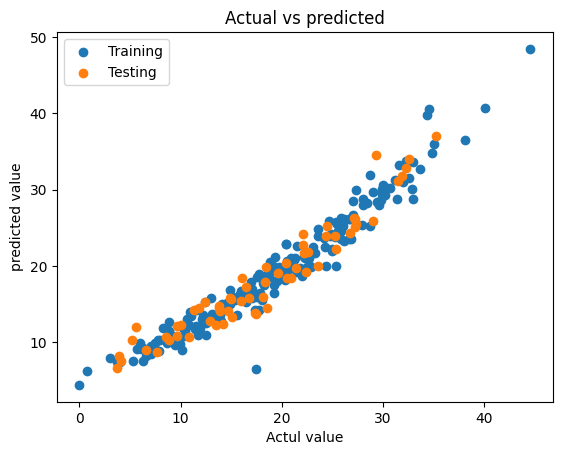

In [153]:
plt.title('Actual vs predicted')
plt.scatter(ytrain,xtpred)
plt.scatter(ytest,xpred)
plt.xlabel('Actul value')

plt.ylabel('predicted value')
plt.legend(['Training','Testing'])
plt.show()

In [154]:
# save model
joblib.dump(model_lstm,'lstm.joblib')

['lstm.joblib']

# compare models

In [162]:
para=pd.DataFrame({'Models':['Random forest','Xgboost','LSTM'],'r2_score':[r1,r2,r3],'mean_squared_error':[mse1,mse2,mse3],'mean_absolute_error':[mae1,mae2,mae3],
                   'root_mean_square':[rmse1,rmse2,rmse3]})

In [163]:
para

Models  r2_score  mean_squared_error  mean_absolute_error  \
0  Random forest  0.975022            1.569190             0.404554   
1        Xgboost  0.968682            1.967472             0.587905   
2           LSTM  0.915588            5.302941             1.849256   

   root_mean_square  
0          1.252673  
1          1.402666  
2          2.302811

In [161]:
# compare by plot

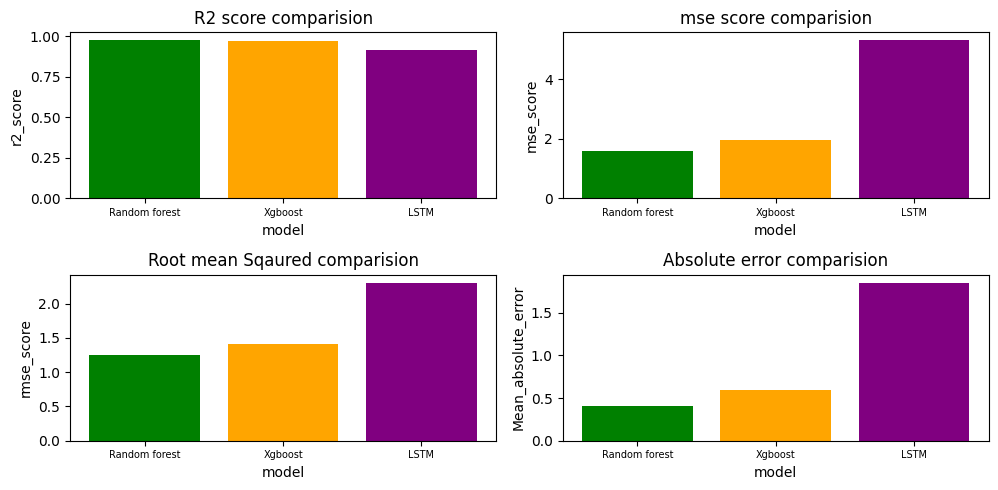

In [167]:

plt.figure(figsize=(10,5))
# r2 score
color = ['green', 'orange', 'purple']

plt.subplot(2,2,1)
plt.bar(para['Models'],para['r2_score'],color=color)
plt.title('R2 score comparision')
plt.xlabel('model')
plt.ylabel('r2_score')
plt.xticks(fontsize=7)



# mean squared error
plt.subplot(2,2,2)
plt.bar(para['Models'],para['mean_squared_error'],color=color)
plt.title('mse score comparision')
plt.xlabel('model')
plt.ylabel('mse_score')
plt.xticks(fontsize=7)



# root mean squared error
plt.subplot(2,2,3)
plt.bar(para['Models'],para['root_mean_square'],color=color)
plt.title('Root mean Sqaured comparision')
plt.xlabel('model')
plt.ylabel('rmse_score')
plt.xticks(fontsize=7)



# mean absolute error
plt.subplot(2,2,4)
plt.bar(para['Models'],para['mean_absolute_error'],color=color)
plt.title('Absolute error comparision')
plt.xlabel('model')
plt.ylabel('Mean_absolute_error')
plt.xticks(fontsize=7)



plt.tight_layout()
plt.show()

In [172]:
# prediction

lmodel=joblib.load('random.joblib')
s_d=joblib.load('scal.joblib')
l1=[1.0708,23,154.25,93.1,85.2,94.5,59.0,37.3,32.0,27.4]
l1=s_d.transform([l1])
lmodel.predict(l1)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([12.289])

In [ ]:
# Below Essential Fat (Less than 2%):

# Dangerously low body fat levels. This can lead to serious health issues such as organ failure, impaired immune function, and hormonal imbalances. It's extremely rare and typically associated with extreme cases like starvation or anorexia.
# Essential Fat: 2-5%

# The minimal amount of fat needed for basic physiological functions. Going below this level can lead to significant health risks.
# Athletes: 6-13%

# A range typical for highly trained athletes with low body fat. These individuals usually have excellent physical fitness and muscle tone.
# Fitness: 14-20%

# A healthy range for individuals who are physically active and maintain good fitness levels. This category is generally considered optimal for health.
# Average: 21-30%

# This is considered a healthy body fat range for the general population. It indicates normal weight and body fat percentages for most people.
# Obese: 31% and above

# A body fat percentage above 31% typically signals obesity. This can increase the risk of various health issues, including diabetes, hypertension, and cardiovascular diseases.